In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
def gme_1(i, j):
    return np.sqrt(1/(i+1) + 1/(j+1))

def gme_2(i, j):
    return np.sqrt(i + j)

def gme_3(i, j):
    return np.sin(i + j)

In [4]:
def rsvd(n, m, r, p, A):
    rank = r + p
    omega = np.random.normal(0, 1, size=(n, rank))
    B = A @ omega
    # print(B.shape)
    Q, R = np.linalg.qr(B)
    to_svd = Q.T @ A
    # print(to_svd.shape)
    U, S, Vh = np.linalg.svd(to_svd, full_matrices=False)
    return (Q @ U), S, Vh

In [5]:
n = 4096

In [6]:
m1 = np.fromfunction(gme_1, (n, n), dtype=float)
m2 = np.fromfunction(gme_2, (n, n), dtype=float)
m3 = np.fromfunction(gme_3, (n, n), dtype=float)

In [7]:
matrix = m1
rank = 10

In [14]:
U, S, Vh = np.linalg.svd(matrix)
U = U[:, 0:rank]
Vh = Vh[0:rank, :]
S = S[0:rank]

In [15]:
oversampling = 2

U1, S1, V1h = rsvd(n, n, rank, oversampling, matrix)
U1 = U1[:, 0:rank]
V1h = V1h[0:rank, :]
S1 = S1[0:rank]

In [16]:
# some computations

In [17]:
# plotting data
ingnore_from = 0
size = S1.shape[0]
S_plot = S[ingnore_from:size]
S1_plot = S1[ingnore_from:size]
idx = np.arange(size)[ingnore_from:]

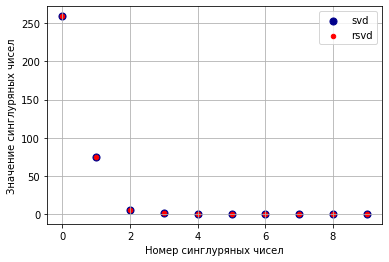

In [18]:
fig, ax = plt.subplots()
ax.scatter(idx, S_plot, label="svd", color='darkblue', s=50)
ax.scatter(idx, S1_plot, label='rsvd', color='red', s=20)
ax.grid()
ax.legend()
ax.set_xlabel("Номер синглуряных чисел")
ax.set_ylabel("Значение синглуряных чисел")
plt.show()

In [19]:
# Апостериорные ошибки
approx_from_svd = U @ np.diag(S) @ Vh
error_from_svd = matrix - approx_from_svd
print("SVD Frobenius Error: ", np.linalg.norm(error_from_svd))

approx_from_rsvd = U1 @ np.diag(S1) @ V1h
error_from_rsvd = matrix - approx_from_rsvd
print("RSVD Frobenius Error: ", np.linalg.norm(error_from_rsvd))

SVD Frobenius Error:  9.864005955557422e-05
RSVD Frobenius Error:  0.00010849711401557324


In [20]:
# Априорные ошибки на матожидание
factor = np.sqrt(1 + ((rank + oversampling) / (oversampling - 1)))
print("Factor in HMT formula:", factor)
print("A-priori Frobenius error: ", factor * np.linalg.norm(error_from_svd))
print("Relation a-prior / a-posteriori: ", (factor * np.linalg.norm(error_from_svd)) / np.linalg.norm(error_from_rsvd))

Factor in HMT formula: 3.605551275463989
A-priori Frobenius error:  0.0003556517925424445
Relation a-prior / a-posteriori:  3.277983896340281
